Genetic algorithm's flowchart:

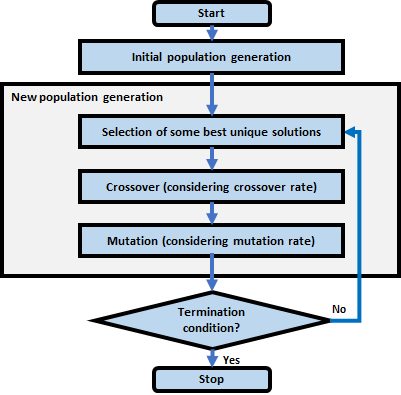


Considered nonlinear objective function:
>$\min f($**x**$)=\max (\frac{(x_1+3x_2)^2}{\sqrt[3]{2x_3+7}}-\frac{x_4ln(x_5)1.06^{x_6}}{x_7}+e^{x_8}|x_9-x_{10}^2|,5000)$

In [ ]:
# A. Objective function definition

import numpy as np
import matplotlib.pyplot as plt  # For figure generation
from matplotlib.ticker import FuncFormatter, MaxNLocator  # For figure generation

# Objective function
def objective_value_calculation(chromosome):
  objective_value = max((pow((chromosome[0]+3*chromosome[1]),2))/pow(2*chromosome[2]+7,1/3)-(chromosome[3]*np.log(chromosome[4]*pow(1.06,chromosome[5])))/chromosome[6]+math.exp(chromosome[7])*abs(chromosome[8]-pow(chromosome[9],2)),5000)
  return objective_value

Program initialization:

In [ ]:
# B. Program initialization

import random
random.seed(14)  # Option to fix the random seed (set as comment to produce various random values)
import math

Input data:

(1) Genetic algorithm parameters:

In [ ]:
# C. Genetic algorithm parameter setting

population_size = 10
num_of_selected_initial_chromosomes = 6
crossover_rate = 0.8
mutation_rate = 0.2
num_of_population = 10

(2) Define chromosome length (based on the number of decision variables):

In [ ]:
# D. Chromosome length determination

chromosome_length = 10

Initial population:

In [ ]:
# E. Initial population generation

# Prepare sets for storing best chromosomes and objective values in all populations
best_chromosomes = []
best_objective_values = []


# Generating chromosomes randomly for the initial population
population = []  # Set of chromosomes in a population
objective_value = []  # Set of objective values of chromosomes in a population
for i in range(population_size):
  chromosome = []  # A single chromosome
  for j in range(chromosome_length):
    if j == 7:
      chromosome += [random.uniform(1,5)]
    else:
      chromosome += [random.uniform(1,100)]
  population += [chromosome]
  
  # Calculating objective values of the chromosomes
  objective_value += [objective_value_calculation(chromosome)]

print('initial population:')
for i in range(population_size):
  rounded_value_chromosome = []
  for j in population[i]:
    rounded_value_chromosome += [float("{:.2f}".format(j))] 
  print('chromosome',i,'= ',rounded_value_chromosome,'; objective_value =',str("{:.2f}".format(objective_value[i])))


# Find the best solution with the least objective value
min_objective_value =  float('inf')
selected_index = -1
for k in range(population_size):
  if objective_value[k] < min_objective_value:
    min_objective_value = objective_value[k]
    selected_index = k

# Store the best solution and the least objective value
best_chromosomes += [population[selected_index]]
best_objective_values += [objective_value[selected_index]]

initial population:
chromosome 0 =  [11.58, 70.56, 65.55, 94.09, 27.84, 26.32, 73.67, 3.63, 31.0, 68.74] ; objective_value = 187335.98
chromosome 1 =  [40.27, 77.97, 12.72, 23.1, 90.24, 36.45, 26.78, 4.22, 63.53, 15.82] ; objective_value = 36236.12
chromosome 2 =  [55.58, 66.74, 17.33, 65.52, 13.18, 34.37, 9.24, 1.82, 97.82, 40.96] ; objective_value = 28571.71
chromosome 3 =  [99.05, 44.43, 61.15, 87.39, 69.0, 12.04, 59.32, 3.53, 18.94, 10.37] ; objective_value = 13707.58
chromosome 4 =  [87.6, 51.86, 20.19, 45.81, 22.6, 80.03, 50.55, 1.41, 81.99, 9.86] ; objective_value = 16400.69
chromosome 5 =  [28.79, 3.77, 74.29, 12.27, 53.05, 10.21, 48.56, 3.74, 53.95, 46.06] ; objective_value = 87474.10
chromosome 6 =  [49.0, 44.27, 59.95, 10.39, 47.98, 24.39, 86.68, 4.76, 7.58, 15.19] ; objective_value = 32514.89
chromosome 7 =  [70.64, 57.57, 2.89, 70.78, 94.45, 42.89, 35.4, 3.28, 93.97, 27.09] ; objective_value = 42281.26
chromosome 8 =  [30.93, 19.68, 63.21, 47.46, 26.35, 39.4, 4.44, 2.25, 9

In [ ]:
# F. Best chromosomes selection (1st population)

print('------------------------------------------------------------------')
print('population 0')
print('------------------------------------------------------------------')

# Store chromosomes and objective_values of current population into prev_population and prev_objective_value
# before performing crossover and mutation operators
prev_population = []
prev_objective_value = []
temp_objective_value = []  # For selecting the best chromosomes before crossover
for j in range(population_size):
  prev_population += [population[j]]
  prev_objective_value += [objective_value[j]]
  temp_objective_value += [objective_value[j]]

# Reset chromosomes and objective_values for the new population
population = []
objective_value = []

# Select best chromosomes
for j in range(num_of_selected_initial_chromosomes):
  min_value = float('inf')
  selected_index = -1
  for k in range(population_size):
    if temp_objective_value[k] < min_value:
      # Skip storing solution if the same solution has been stored before
      same_chromosome = 0
      for l in range(len(objective_value)):
        if temp_objective_value[k] == objective_value[l]:
          same_chromosome = 1
          for m in range(len(population[l])):
            if prev_population[k][m] != population[l][m]:
              same_chromosome = 0
              break
          if same_chromosome == 1:
            break
      if same_chromosome == 1:
        continue
      min_value = temp_objective_value[k]
      selected_index = k
  temp_objective_value[selected_index] = float('inf')
  population += [prev_population[selected_index]]
  objective_value += [prev_objective_value[selected_index]]

print()
print('best chromosomes:')
for i in range(len(population)):
  rounded_value_chromosome = []
  for j in population[i]:
    rounded_value_chromosome += [float("{:.2f}".format(j))] 
  print('chromosome',i,'= ',rounded_value_chromosome,'; objective_value =',str("{:.2f}".format(objective_value[i])))

------------------------------------------------------------------
population 0
------------------------------------------------------------------

best chromosomes:
chromosome 0 =  [99.05, 44.43, 61.15, 87.39, 69.0, 12.04, 59.32, 3.53, 18.94, 10.37] ; objective_value = 13707.58
chromosome 1 =  [87.6, 51.86, 20.19, 45.81, 22.6, 80.03, 50.55, 1.41, 81.99, 9.86] ; objective_value = 16400.69
chromosome 2 =  [28.98, 93.68, 36.47, 25.9, 4.48, 15.47, 20.7, 1.92, 87.43, 27.19] ; objective_value = 26753.52
chromosome 3 =  [55.58, 66.74, 17.33, 65.52, 13.18, 34.37, 9.24, 1.82, 97.82, 40.96] ; objective_value = 28571.71
chromosome 4 =  [49.0, 44.27, 59.95, 10.39, 47.98, 24.39, 86.68, 4.76, 7.58, 15.19] ; objective_value = 32514.89
chromosome 5 =  [30.93, 19.68, 63.21, 47.46, 26.35, 39.4, 4.44, 2.25, 98.31, 59.02] ; objective_value = 33632.80


In [ ]:
# G. Crossover operation (1st population)

# Perform crossover if a random value is less than the crossover_rate; otherwise, copy the values from the parents 
while len(population) < population_size:

  child1_chromosome = []
  child2_chromosome = []

  # Set selection probability for each parent
  # Chromosomes with smaller objective value (cost) must have higher selection probability
  total_inverse_of_objective_value = 0
  for j in range(num_of_selected_initial_chromosomes):
    total_inverse_of_objective_value += 1/objective_value[j]
  selection_probability_of_parents = list()
  accumulated_selection_probability_of_parents = list()
  temp_accumulated_value = 0
  for j in range(num_of_selected_initial_chromosomes):
      probability = (1/objective_value[j])/total_inverse_of_objective_value
      selection_probability_of_parents += [probability]
      accumulated_selection_probability_of_parents += [temp_accumulated_value + probability]
      temp_accumulated_value += probability
  accumulated_selection_probability_of_parents[num_of_selected_initial_chromosomes-1] = 1.0
  
  a_random_value = random.random()
  for j in range(num_of_selected_initial_chromosomes-1, -1, -1):
      randomly_selected_parent1_ID = j
      parent1_chromosome = list()
      for k in range(len(population[randomly_selected_parent1_ID])):
          parent1_chromosome += [population[randomly_selected_parent1_ID][k]]
      parent1_objective_values = objective_value[randomly_selected_parent1_ID]
      if a_random_value > accumulated_selection_probability_of_parents[j]:
          break

  same_parent_ID_found = 1
  while same_parent_ID_found == 1:
      a_random_value = random.random()
      for j in range(num_of_selected_initial_chromosomes-1, -1, -1):
          randomly_selected_parent2_ID = j
          parent2_chromosome = list()
          for k in range(len(population[randomly_selected_parent2_ID])):
              parent2_chromosome += [population[randomly_selected_parent2_ID][k]]
          parent2_objective_values = objective_value[randomly_selected_parent2_ID]
          if a_random_value > accumulated_selection_probability_of_parents[j]:
              break

      if randomly_selected_parent2_ID != randomly_selected_parent1_ID:  
          same_parent_ID_found = 0


  a_random_value = random.random()
  if a_random_value > crossover_rate:
    population += [parent1_chromosome]
    population += [parent2_chromosome]
    objective_value += [objective_value[randomly_selected_parent1_ID]]
    objective_value += [objective_value[randomly_selected_parent2_ID]]
  else:
    for j in range(chromosome_length):
      value_0_or_1 = random.randint(0,1)
      if value_0_or_1 == 0:
        child1_chromosome += [parent1_chromosome[j]]
        child2_chromosome += [parent2_chromosome[j]]
      else:
        child1_chromosome += [parent2_chromosome[j]]
        child2_chromosome += [parent1_chromosome[j]]
    child1_objective_values = objective_value_calculation(child1_chromosome)
    child2_objective_values = objective_value_calculation(child2_chromosome)

    # Find two best chromosomes among parent and child chromosomes
    temp_objective_value_of_chromosomes = list()
    temp_chromosomes = [[-1 for x in range(chromosome_length)] for y in range(4)]
    index_of_chromosome = 0

    temp_objective_value_of_chromosomes += [parent1_objective_values]
    temp_chromosomes[0] = parent1_chromosome
    temp_objective_value_of_chromosomes += [parent2_objective_values]
    temp_chromosomes[1] = parent2_chromosome
    temp_objective_value_of_chromosomes += [child1_objective_values]
    temp_chromosomes[2] = child1_chromosome
    temp_objective_value_of_chromosomes += [child2_objective_values]
    temp_chromosomes[3] = child2_chromosome

    temp_best_objective_value_of_chromosomes = float('inf')
    for j in range(4):
        if temp_objective_value_of_chromosomes[j] < temp_best_objective_value_of_chromosomes:
            temp_best_objective_value_of_chromosomes = temp_objective_value_of_chromosomes[j]
            selected_temp_chromosome_ID = j
    population += [temp_chromosomes[selected_temp_chromosome_ID]]
    objective_value += [temp_objective_value_of_chromosomes[selected_temp_chromosome_ID]]
    temp_objective_value_of_chromosomes[selected_temp_chromosome_ID] = float('inf')

    temp_best_objective_value_of_chromosomes = float('inf')
    for j in range(4):
        if temp_objective_value_of_chromosomes[j] < temp_best_objective_value_of_chromosomes:
            temp_best_objective_value_of_chromosomes = temp_objective_value_of_chromosomes[j]
            selected_temp_chromosome_ID = j
    population += [temp_chromosomes[selected_temp_chromosome_ID]]
    objective_value += [temp_objective_value_of_chromosomes[selected_temp_chromosome_ID]]

print('population (after crossover):')
for i in range(population_size):
  rounded_value_chromosome = []
  for j in population[i]:
    rounded_value_chromosome += [float("{:.2f}".format(j))] 
  print('chromosome',i,'= ',rounded_value_chromosome,'; objective_value =',str("{:.2f}".format(objective_value[i])))

population (after crossover):
chromosome 0 =  [99.05, 44.43, 61.15, 87.39, 69.0, 12.04, 59.32, 3.53, 18.94, 10.37] ; objective_value = 13707.58
chromosome 1 =  [87.6, 51.86, 20.19, 45.81, 22.6, 80.03, 50.55, 1.41, 81.99, 9.86] ; objective_value = 16400.69
chromosome 2 =  [28.98, 93.68, 36.47, 25.9, 4.48, 15.47, 20.7, 1.92, 87.43, 27.19] ; objective_value = 26753.52
chromosome 3 =  [55.58, 66.74, 17.33, 65.52, 13.18, 34.37, 9.24, 1.82, 97.82, 40.96] ; objective_value = 28571.71
chromosome 4 =  [49.0, 44.27, 59.95, 10.39, 47.98, 24.39, 86.68, 4.76, 7.58, 15.19] ; objective_value = 32514.89
chromosome 5 =  [30.93, 19.68, 63.21, 47.46, 26.35, 39.4, 4.44, 2.25, 98.31, 59.02] ; objective_value = 33632.80
chromosome 6 =  [99.05, 44.43, 61.15, 87.39, 69.0, 12.04, 59.32, 3.53, 18.94, 10.37] ; objective_value = 13707.58
chromosome 7 =  [87.6, 51.86, 20.19, 45.81, 22.6, 80.03, 50.55, 1.41, 81.99, 9.86] ; objective_value = 16400.69
chromosome 8 =  [99.05, 44.43, 36.47, 25.9, 4.48, 12.04, 20.7, 1.9

In [ ]:
# H. Mutation operation (1st population)

# Perform mutation if a random value is less than the mutation_rate; otherwise, copy the values from the parents 
for l in range(population_size):

  child_chromosome = []

  # Set selection probability for each parent
  # Chromosomes with smaller objective value (cost) must have higher selection probability
  total_inverse_of_objective_value = 0
  for j in range(num_of_selected_initial_chromosomes):
    total_inverse_of_objective_value += 1/objective_value[j]
  selection_probability_of_parents = list()
  accumulated_selection_probability_of_parents = list()
  temp_accumulated_value = 0
  for j in range(num_of_selected_initial_chromosomes):
      probability = (1/objective_value[j])/total_inverse_of_objective_value
      selection_probability_of_parents += [probability]
      accumulated_selection_probability_of_parents += [temp_accumulated_value + probability]
      temp_accumulated_value += probability
  accumulated_selection_probability_of_parents[num_of_selected_initial_chromosomes-1] = 1.0
  
  a_random_value = random.random()
  for j in range(num_of_selected_initial_chromosomes-1, -1, -1):
      randomly_selected_parent_ID = j
      parent_chromosome = list()
      for k in range(len(population[randomly_selected_parent_ID])):
          parent_chromosome += [population[randomly_selected_parent_ID][k]]
      parent_objective_value = objective_value[randomly_selected_parent_ID]
      if a_random_value > accumulated_selection_probability_of_parents[j]:
          break

  a_random_value = random.random()
  if a_random_value > mutation_rate:
    population += [parent_chromosome]
    objective_value += [objective_value[randomly_selected_parent_ID]]
  else:
    for j in range(chromosome_length):
      value_0_or_1 = random.randint(0,1)
      if value_0_or_1 == 0:
        child_chromosome += [parent_chromosome[j]]
      else:
        for j in range(chromosome_length):
          if j == 7:
            child_chromosome += [random.uniform(1,5)]
          else:
            child_chromosome += [random.uniform(1,100)]

    child_objective_value = objective_value_calculation(child_chromosome)

    # Store the best chromosome among parent and child chromosomes
    if parent_objective_value < child_objective_value:
      population += [parent_chromosome]
      objective_value += [objective_value[randomly_selected_parent_ID]]
    else:
      population += [child_chromosome]
      objective_value += [child_objective_value]

print('population (after mutation):')
for i in range(population_size):
  rounded_value_chromosome = []
  for j in population[i]:
    rounded_value_chromosome += [float("{:.2f}".format(j))] 
  print('chromosome',i,'= ',rounded_value_chromosome,'; objective_value =',str("{:.2f}".format(objective_value[i])))


# Find the best solution with the least objective value
min_objective_value =  float('inf')
selected_index = -1
for k in range(population_size):
  if objective_value[k] < min_objective_value:
    min_objective_value = objective_value[k]
    selected_index = k

# Store the best solution and the least objective value
best_chromosomes += [population[selected_index]]
best_objective_values += [objective_value[selected_index]]

population (after mutation):
chromosome 0 =  [99.05, 44.43, 61.15, 87.39, 69.0, 12.04, 59.32, 3.53, 18.94, 10.37] ; objective_value = 13707.58
chromosome 1 =  [87.6, 51.86, 20.19, 45.81, 22.6, 80.03, 50.55, 1.41, 81.99, 9.86] ; objective_value = 16400.69
chromosome 2 =  [28.98, 93.68, 36.47, 25.9, 4.48, 15.47, 20.7, 1.92, 87.43, 27.19] ; objective_value = 26753.52
chromosome 3 =  [55.58, 66.74, 17.33, 65.52, 13.18, 34.37, 9.24, 1.82, 97.82, 40.96] ; objective_value = 28571.71
chromosome 4 =  [49.0, 44.27, 59.95, 10.39, 47.98, 24.39, 86.68, 4.76, 7.58, 15.19] ; objective_value = 32514.89
chromosome 5 =  [30.93, 19.68, 63.21, 47.46, 26.35, 39.4, 4.44, 2.25, 98.31, 59.02] ; objective_value = 33632.80
chromosome 6 =  [99.05, 44.43, 61.15, 87.39, 69.0, 12.04, 59.32, 3.53, 18.94, 10.37] ; objective_value = 13707.58
chromosome 7 =  [87.6, 51.86, 20.19, 45.81, 22.6, 80.03, 50.55, 1.41, 81.99, 9.86] ; objective_value = 16400.69
chromosome 8 =  [99.05, 44.43, 36.47, 25.9, 4.48, 12.04, 20.7, 1.92

No handles with labels found to put in legend.


------------------------------------------------------------------
population 1
------------------------------------------------------------------

best chromosomes:
chromosome 0 =  [99.05, 44.43, 36.47, 25.9, 4.48, 12.04, 20.7, 1.92, 87.43, 10.37] ; objective_value = 12665.16
chromosome 1 =  [99.05, 44.43, 61.15, 87.39, 69.0, 12.04, 59.32, 3.53, 18.94, 10.37] ; objective_value = 13707.58
chromosome 2 =  [87.6, 51.86, 20.19, 45.81, 22.6, 80.03, 50.55, 1.41, 81.99, 9.86] ; objective_value = 16400.69
chromosome 3 =  [28.98, 93.68, 36.47, 25.9, 4.48, 15.47, 20.7, 1.92, 87.43, 27.19] ; objective_value = 26753.52
chromosome 4 =  [55.58, 66.74, 17.33, 65.52, 13.18, 34.37, 9.24, 1.82, 97.82, 40.96] ; objective_value = 28571.71
chromosome 5 =  [49.0, 44.27, 59.95, 10.39, 47.98, 24.39, 86.68, 4.76, 7.58, 15.19] ; objective_value = 32514.89

population (after crossover):
chromosome 0 =  [99.05, 44.43, 36.47, 25.9, 4.48, 12.04, 20.7, 1.92, 87.43, 10.37] ; objective_value = 12665.16
chromosome 1 =

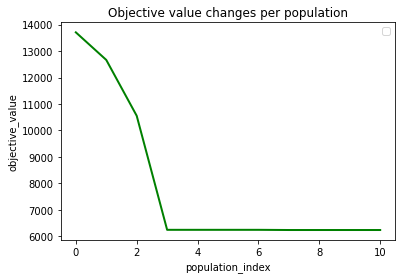

In [ ]:
# I. Best chromosomes selection, crossover & mutation operations (2nd population until the last population), result presentation

for i in range(num_of_population):

  if i == 0:
    continue  

  print('------------------------------------------------------------------')
  print('population',i)
  print('------------------------------------------------------------------')

  # Store chromosomes and objective_values of current population into prev_population and prev_objective_value
  # before performing crossover and mutation operators
  prev_population = []
  prev_objective_value = []
  temp_objective_value = []  # For selecting the best chromosomes before crossover
  for j in range(population_size):
    prev_population += [population[j]]
    prev_objective_value += [objective_value[j]]
    temp_objective_value += [objective_value[j]]

  # Reset chromosomes and objective_values for the new population
  population = []
  objective_value = []

  # Select best chromosomes
  for j in range(num_of_selected_initial_chromosomes):
    min_value = float('inf')
    selected_index = -1
    for k in range(population_size):
      if temp_objective_value[k] < min_value:
        # Skip storing solution if the same solution has been stored before
        same_chromosome = 0
        for l in range(len(objective_value)):
          if temp_objective_value[k] == objective_value[l]:
            same_chromosome = 1
            for m in range(len(population[l])):
              if prev_population[k][m] != population[l][m]:
                same_chromosome = 0
                break
            if same_chromosome == 1:
              break
        if same_chromosome == 1:
          continue
        min_value = temp_objective_value[k]
        selected_index = k
    temp_objective_value[selected_index] = float('inf')
    population += [prev_population[selected_index]]
    objective_value += [prev_objective_value[selected_index]]

  print()
  print('best chromosomes:')
  for j in range(len(population)):
    rounded_value_chromosome = []
    for k in population[j]:
      rounded_value_chromosome += [float("{:.2f}".format(k))] 
    print('chromosome',j,'= ',rounded_value_chromosome,'; objective_value =',str("{:.2f}".format(objective_value[j])))


  # Perform crossover

  # Perform crossover if a random value is less than the crossover_rate; otherwise, copy the values from the parents 
  while len(population) < population_size:

    child1_chromosome = []
    child2_chromosome = []

    # Set selection probability for each parent
    # Chromosomes with smaller objective value (cost) must have higher selection probability
    total_inverse_of_objective_value = 0
    for j in range(num_of_selected_initial_chromosomes):
      total_inverse_of_objective_value += 1/objective_value[j]
    selection_probability_of_parents = list()
    accumulated_selection_probability_of_parents = list()
    temp_accumulated_value = 0
    for j in range(num_of_selected_initial_chromosomes):
        probability = (1/objective_value[j])/total_inverse_of_objective_value
        selection_probability_of_parents += [probability]
        accumulated_selection_probability_of_parents += [temp_accumulated_value + probability]
        temp_accumulated_value += probability
    accumulated_selection_probability_of_parents[num_of_selected_initial_chromosomes-1] = 1.0
    
    a_random_value = random.random()
    for j in range(num_of_selected_initial_chromosomes-1, -1, -1):
        randomly_selected_parent1_ID = j
        parent1_chromosome = list()
        for k in range(len(population[randomly_selected_parent1_ID])):
            parent1_chromosome += [population[randomly_selected_parent1_ID][k]]
        parent1_objective_values = objective_value[randomly_selected_parent1_ID]
        if a_random_value > accumulated_selection_probability_of_parents[j]:
            break

    same_parent_ID_found = 1
    while same_parent_ID_found == 1:
        a_random_value = random.random()
        for j in range(num_of_selected_initial_chromosomes-1, -1, -1):
            randomly_selected_parent2_ID = j
            parent2_chromosome = list()
            for k in range(len(population[randomly_selected_parent2_ID])):
                parent2_chromosome += [population[randomly_selected_parent2_ID][k]]
            parent2_objective_values = objective_value[randomly_selected_parent2_ID]
            if a_random_value > accumulated_selection_probability_of_parents[j]:
                break

        if randomly_selected_parent2_ID != randomly_selected_parent1_ID:  
            same_parent_ID_found = 0


    a_random_value = random.random()
    if a_random_value > crossover_rate:
      population += [parent1_chromosome]
      population += [parent2_chromosome]
      objective_value += [objective_value[randomly_selected_parent1_ID]]
      objective_value += [objective_value[randomly_selected_parent2_ID]]
    else:
      for j in range(chromosome_length):
        value_0_or_1 = random.randint(0,1)
        if value_0_or_1 == 0:
          child1_chromosome += [parent1_chromosome[j]]
          child2_chromosome += [parent2_chromosome[j]]
        else:
          child1_chromosome += [parent2_chromosome[j]]
          child2_chromosome += [parent1_chromosome[j]]
      child1_objective_values = objective_value_calculation(child1_chromosome)
      child2_objective_values = objective_value_calculation(child2_chromosome)

      # Find two best chromosomes among parent and child chromosomes
      temp_objective_value_of_chromosomes = list()
      temp_chromosomes = [[-1 for x in range(chromosome_length)] for y in range(4)]
      index_of_chromosome = 0

      temp_objective_value_of_chromosomes += [parent1_objective_values]
      temp_chromosomes[0] = parent1_chromosome
      temp_objective_value_of_chromosomes += [parent2_objective_values]
      temp_chromosomes[1] = parent2_chromosome
      temp_objective_value_of_chromosomes += [child1_objective_values]
      temp_chromosomes[2] = child1_chromosome
      temp_objective_value_of_chromosomes += [child2_objective_values]
      temp_chromosomes[3] = child2_chromosome

      temp_best_objective_value_of_chromosomes = float('inf')
      for j in range(4):
          if temp_objective_value_of_chromosomes[j] < temp_best_objective_value_of_chromosomes:
              temp_best_objective_value_of_chromosomes = temp_objective_value_of_chromosomes[j]
              selected_temp_chromosome_ID = j
      population += [temp_chromosomes[selected_temp_chromosome_ID]]
      objective_value += [temp_objective_value_of_chromosomes[selected_temp_chromosome_ID]]
      temp_objective_value_of_chromosomes[selected_temp_chromosome_ID] = float('inf')

      temp_best_objective_value_of_chromosomes = float('inf')
      for j in range(4):
          if temp_objective_value_of_chromosomes[j] < temp_best_objective_value_of_chromosomes:
              temp_best_objective_value_of_chromosomes = temp_objective_value_of_chromosomes[j]
              selected_temp_chromosome_ID = j
      population += [temp_chromosomes[selected_temp_chromosome_ID]]
      objective_value += [temp_objective_value_of_chromosomes[selected_temp_chromosome_ID]]

  print()
  print('population (after crossover):')
  for j in range(population_size):
    rounded_value_chromosome = []
    for k in population[j]:
      rounded_value_chromosome += [float("{:.2f}".format(k))] 
    print('chromosome',j,'= ',rounded_value_chromosome,'; objective_value =',str("{:.2f}".format(objective_value[j])))


  # Perform mutation

  # Perform mutation if a random value is less than the mutation_rate; otherwise, copy the values from the parents 
  for l in range(population_size):

    child_chromosome = []

    # Set selection probability for each parent
    # Chromosomes with smaller objective value (cost) must have higher selection probability
    total_inverse_of_objective_value = 0
    for j in range(num_of_selected_initial_chromosomes):
      total_inverse_of_objective_value += 1/objective_value[j]
    selection_probability_of_parents = list()
    accumulated_selection_probability_of_parents = list()
    temp_accumulated_value = 0
    for j in range(num_of_selected_initial_chromosomes):
        probability = (1/objective_value[j])/total_inverse_of_objective_value
        selection_probability_of_parents += [probability]
        accumulated_selection_probability_of_parents += [temp_accumulated_value + probability]
        temp_accumulated_value += probability
    accumulated_selection_probability_of_parents[num_of_selected_initial_chromosomes-1] = 1.0
    
    a_random_value = random.random()
    for j in range(num_of_selected_initial_chromosomes-1, -1, -1):
        randomly_selected_parent_ID = j
        parent_chromosome = list()
        for k in range(len(population[randomly_selected_parent_ID])):
            parent_chromosome += [population[randomly_selected_parent_ID][k]]
        parent_objective_value = objective_value[randomly_selected_parent_ID]
        if a_random_value > accumulated_selection_probability_of_parents[j]:
            break

    a_random_value = random.random()
    if a_random_value > mutation_rate:
      population += [parent_chromosome]
      objective_value += [objective_value[randomly_selected_parent_ID]]
    else:
      for j in range(chromosome_length):
        value_0_or_1 = random.randint(0,1)
        if value_0_or_1 == 0:
          child_chromosome += [parent_chromosome[j]]
        else:
          for j in range(chromosome_length):
            if j == 7:
              child_chromosome += [random.uniform(1,5)]
            else:
              child_chromosome += [random.uniform(1,100)]

      child_objective_value = objective_value_calculation(child_chromosome)

      # Store the best chromosome among parent and child chromosomes
      if parent_objective_value < child_objective_value:
        population += [parent_chromosome]
        objective_value += [objective_value[randomly_selected_parent_ID]]
      else:
        population += [child_chromosome]
        objective_value += [child_objective_value]

  print()
  print('population (after mutation):')
  for j in range(population_size):
    rounded_value_chromosome = []
    for k in population[j]:
      rounded_value_chromosome += [float("{:.2f}".format(k))] 
    print('chromosome',j,'= ',rounded_value_chromosome,'; objective_value =',str("{:.2f}".format(objective_value[j])))
  print()
  print()


  # Find the best solution with the least objective value
  min_objective_value =  float('inf')
  selected_index = -1
  for k in range(population_size):
    if objective_value[k] < min_objective_value:
      min_objective_value = objective_value[k]
      selected_index = k

  # Store the best solution and the least objective value
  best_chromosomes += [population[selected_index]]
  best_objective_values += [objective_value[selected_index]]


print('Best solutions in each population:')
for j in range(len(best_objective_values)):
  rounded_value_chromosome = []
  for k in best_chromosomes[j]:
    rounded_value_chromosome += [float("{:.2f}".format(k))] 
  print('best_chromosome',j,'= ',rounded_value_chromosome,'; best_objective_value =',str("{:.2f}".format(best_objective_values[j])))
print()

# Figure generation
plot_x = list()
for i in range(len(best_objective_values)):
    plot_x += [i]
fig, data = plt.subplots()
data.plot(plot_x, best_objective_values, color='green', linewidth=2)
leg = data.legend();
data.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title('Objective value changes per population')
plt.xlabel("population_index")
plt.ylabel("objective_value")

plt.show()